### Mall Customer Segmentation Analysis:
Below is an analysis of mall customer data. Was done with a k-nearest-neighbours algorithm and Principcal Component Analysis completed through sklearn. An interpretation of the results follows at the end. 
The data was collected from: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


In [192]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [193]:
#importing data
data_raw = pd.read_csv('data/Mall_Customers.csv')
print(data_raw.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [194]:
#standardizing data
col = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
desc = data_raw[col]
scaler = StandardScaler().fit(desc.values)
desc = scaler.transform(desc.values)
data_scaled = pd.DataFrame(desc, columns = col)

#Making gender a binary variable: male = 1 & female = 0
gender = data_raw['Gender']
data_tidy = data_scaled.join(gender)
data_tidy = pd.get_dummies(data_tidy, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
data_tidy.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Male
0,-1.738999,-1.424569,-0.434801,1
1,-1.738999,-1.281035,1.195704,1
2,-1.700830,-1.352802,-1.715913,0
3,-1.700830,-1.137502,1.040418,0
4,-1.662660,-0.563369,-0.395980,0


Text(0, 0.5, 'SSE')

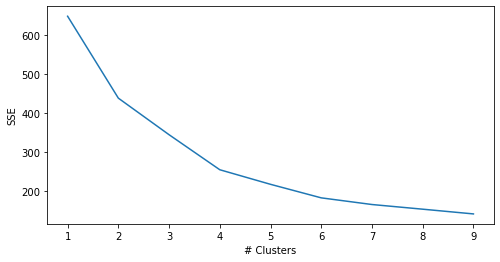

In [195]:
#computing sse for varying numbers of clusters
SSE = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(data_tidy)
    SSE.append(kmeans.inertia_)

#creating a data fram of the results:
data_clusters = pd.DataFrame({'k':range(1,10), 'SSE':SSE})
plt.figure(figsize=(8,4))
plt.plot(data_clusters['k'], data_clusters['SSE'])
plt.xlabel('# Clusters')
plt.ylabel('SSE')

The elbow occurs at k = 4. 
Next steps of analysis will be done with 4 clusters

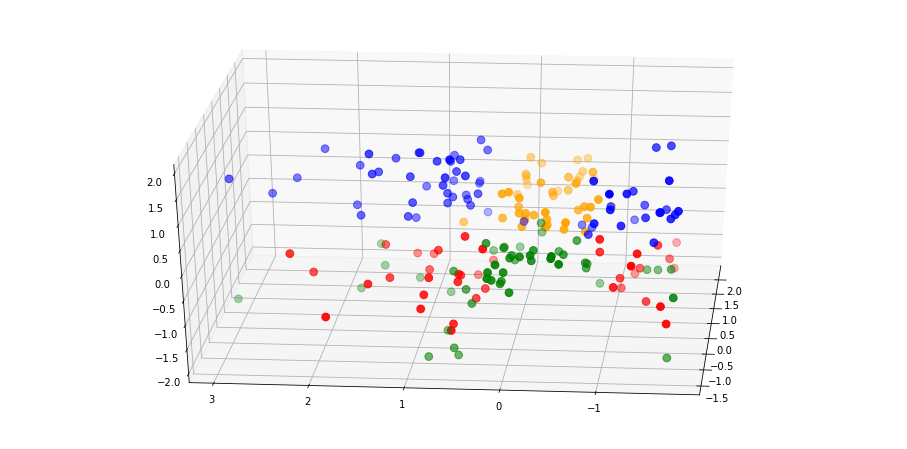

In [196]:
model = KMeans(n_clusters = 4, init='k-means++')
model.fit(data_tidy)
clusters = model.fit_predict(data_tidy.iloc[:,1:])
data_tidy["label"] = clusters
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tidy.Age[data_tidy.label == 0], data_tidy["Annual Income (k$)"][data_tidy.label == 0], data_tidy["Spending Score (1-100)"][data_tidy.label == 0], c='blue', s=60)

ax.scatter(data_tidy.Age[data_tidy.label == 1], data_tidy["Annual Income (k$)"][data_tidy.label == 1], data_tidy["Spending Score (1-100)"][data_tidy.label == 1], c='red', s=60)
ax.scatter(data_tidy.Age[data_tidy.label == 2], data_tidy["Annual Income (k$)"][data_tidy.label == 2], data_tidy["Spending Score (1-100)"][data_tidy.label == 2], c='green', s=60)
ax.scatter(data_tidy.Age[data_tidy.label == 3], data_tidy["Annual Income (k$)"][data_tidy.label == 3], data_tidy["Spending Score (1-100)"][data_tidy.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

There is some overlap between the clusters, especially the bottom two. Will do PCA then knn again to see if it can be fixed

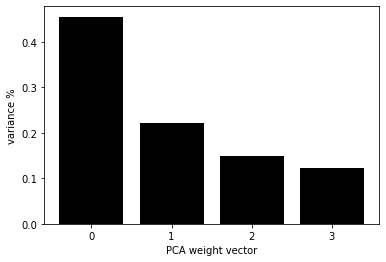

In [197]:
pca = PCA(n_components=4)
PCA_tranform = pca.fit_transform(data_tidy)

weights = range(pca.n_components_)
plt.bar(weights, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA weight vector')
plt.ylabel('variance %')
plt.xticks(weights)

data_PCA = pd.DataFrame(PCA_tranform)

Text(0, 0.5, 'SSE')

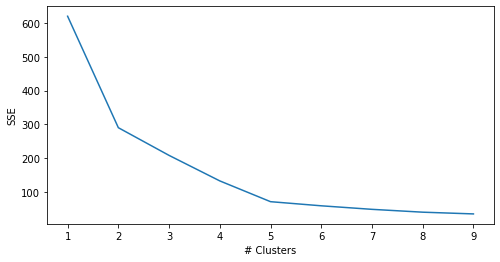

In [198]:
#computing sse for varying numbers of clusters
SSE = []
ks = range(1,10)
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(data_PCA.iloc[:,:2])
    SSE.append(model.inertia_)

#creating a data fram of the results:
plt.figure(figsize=(8,4))
plt.plot(ks, SSE)
plt.xlabel('# Clusters')
plt.ylabel('SSE')

Again the elbow appears at k = 4

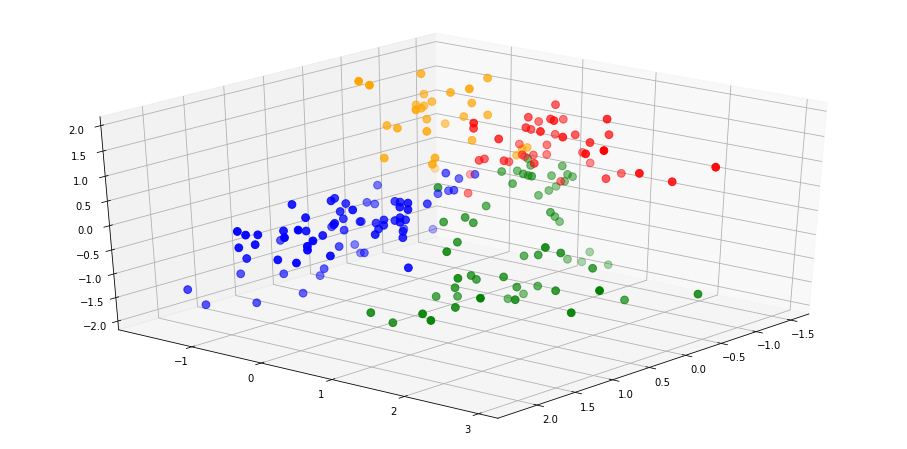

In [199]:
model = KMeans(n_clusters = 4, init='k-means++')
model.fit(data_PCA.iloc[:,:4])
clusters = model.fit_predict(data_PCA.iloc[:,:2])
data_tidy.drop(['label'],axis=1)
data_tidy["label"] = clusters

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tidy.Age[data_tidy.label == 0], data_tidy["Annual Income (k$)"][data_tidy.label == 0], data_tidy["Spending Score (1-100)"][data_tidy.label == 0], c='blue', s=60)
ax.scatter(data_tidy.Age[data_tidy.label == 1], data_tidy["Annual Income (k$)"][data_tidy.label == 1], data_tidy["Spending Score (1-100)"][data_tidy.label == 1], c='red', s=60)
ax.scatter(data_tidy.Age[data_tidy.label == 2], data_tidy["Annual Income (k$)"][data_tidy.label == 2], data_tidy["Spending Score (1-100)"][data_tidy.label == 2], c='green', s=60)
ax.scatter(data_tidy.Age[data_tidy.label == 3], data_tidy["Annual Income (k$)"][data_tidy.label == 3], data_tidy["Spending Score (1-100)"][data_tidy.label == 3], c='orange', s=60)

ax.view_init(30, 40)
plt.show()

This graph might look like it has overlapping data depending on what angle you view it from, can adjust to see the speration between categories.

### Exploring Categories:

In [200]:
data_ana = data_raw
data_ana = pd.DataFrame(data_ana.drop(['CustomerID'],axis=1))
data_ana['label'] = clusters
data_ana.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [201]:
averages = data_ana.groupby(['label'], as_index=False).mean()
averages

,label,Age,Annual Income (k$),Spending Score (1-100)
0,0,50.794521,45.273973,40.356164
1,1,32.902439,85.414634,81.000000
2,2,34.793103,77.603448,29.206897
3,3,24.821429,28.714286,74.250000


In [202]:
genders = pd.DataFrame(data_ana.groupby(['label','Gender'])['Gender'].count())
genders

Gender
label Gender        
0     Female      45
      Male        28
1     Female      23
      Male        18
2     Female      30
      Male        28
3     Female      14
      Male        14

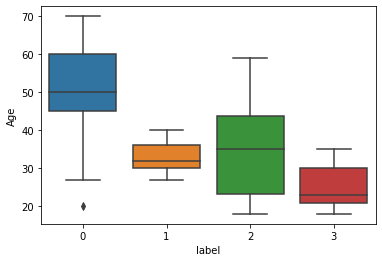

In [203]:
sp.boxplot(x='label',y='Age',data=data_ana)

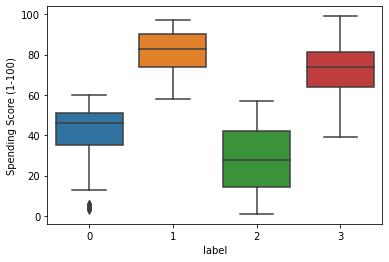

In [204]:
sp.boxplot(x='label',y='Spending Score (1-100)',data=data_ana)

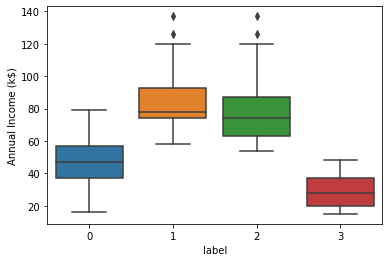

In [205]:
sp.boxplot(x='label',y='Annual Income (k$)',data=data_ana)

### Results
Running the PCA and knn analysis multiple times (as it will produce slightly different results each time) leads to several identifyable categories. My description and analysis of each are below:
1. First real jobs: low earning, high spending, typically young individuals. Low expenses and few commitments mean these individuals can spend a lot
    - Appearance (Cloths, makeup) and travel will likely preform well with these individuals.
    - Advertise on instagram and tiktok to reach this market
2. Frugal spenders: High earning but low spending individuals
    - Sales and high value products will likely attract this type of individual.
    - Facebook and instagram advertisements will target this group
3. Ballers: High earning high spending individuals
    - luxury items and experiences will likely preform well with these individuals.
    - Can be hard to advertise to as they likely don't spend much time consuming media (tv or social)
4. Retirement Savers: lower income and spending individuals who tend to be older. These individuals are likely saving for or living in retirment. 
    - Healthcare products will likely sell well to these individuals.
    - Facebook advertisements will reach this segment 